In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


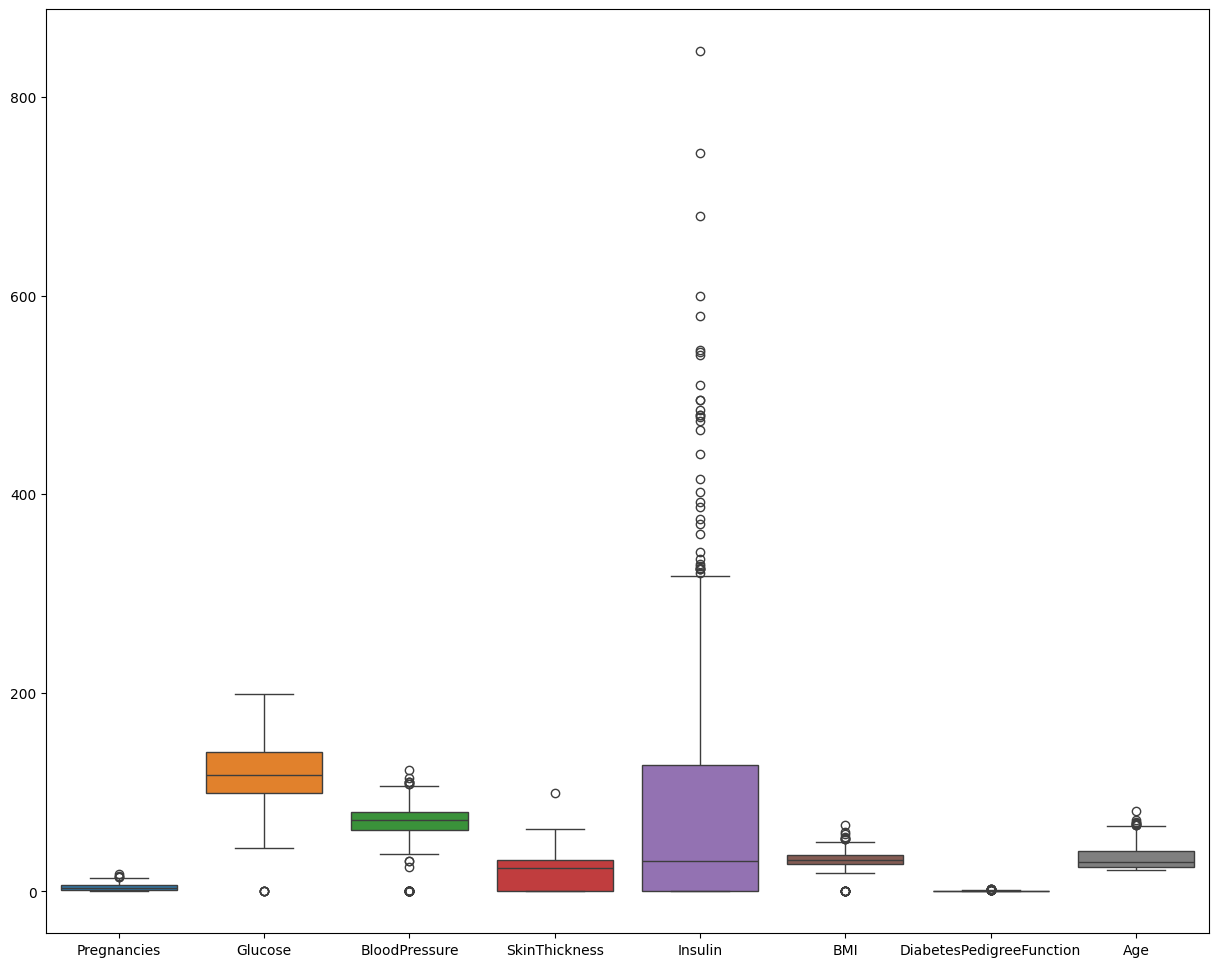

In [10]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x,ax=ax)
plt.savefig('Boxplot.jpg')
plt.show()

In [11]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
  q1=data[col].quantile(0.25)
  q2=data[col].quantile(0.75)
  iqr=q2-q1
  upper_limit=q2+1.5*iqr
  lower_limit=q1-1.5*iqr
  x_out_det=x[(x[col]>=lower_limit) & (x[col]<=upper_limit)]

In [12]:
x_out_det.shape

(759, 8)

In [13]:
q3=y.quantile(0.25)
q4=y.quantile(0.75)
iqr=q4-q3
upper_limit=q4+1.5*iqr
lower_limit=q3-1.5*iqr
y_out_det=y[(y>=lower_limit) & (y<=upper_limit)]

In [14]:
y_out_det.shape

(768,)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scar=scaler.fit_transform(x_out_det)

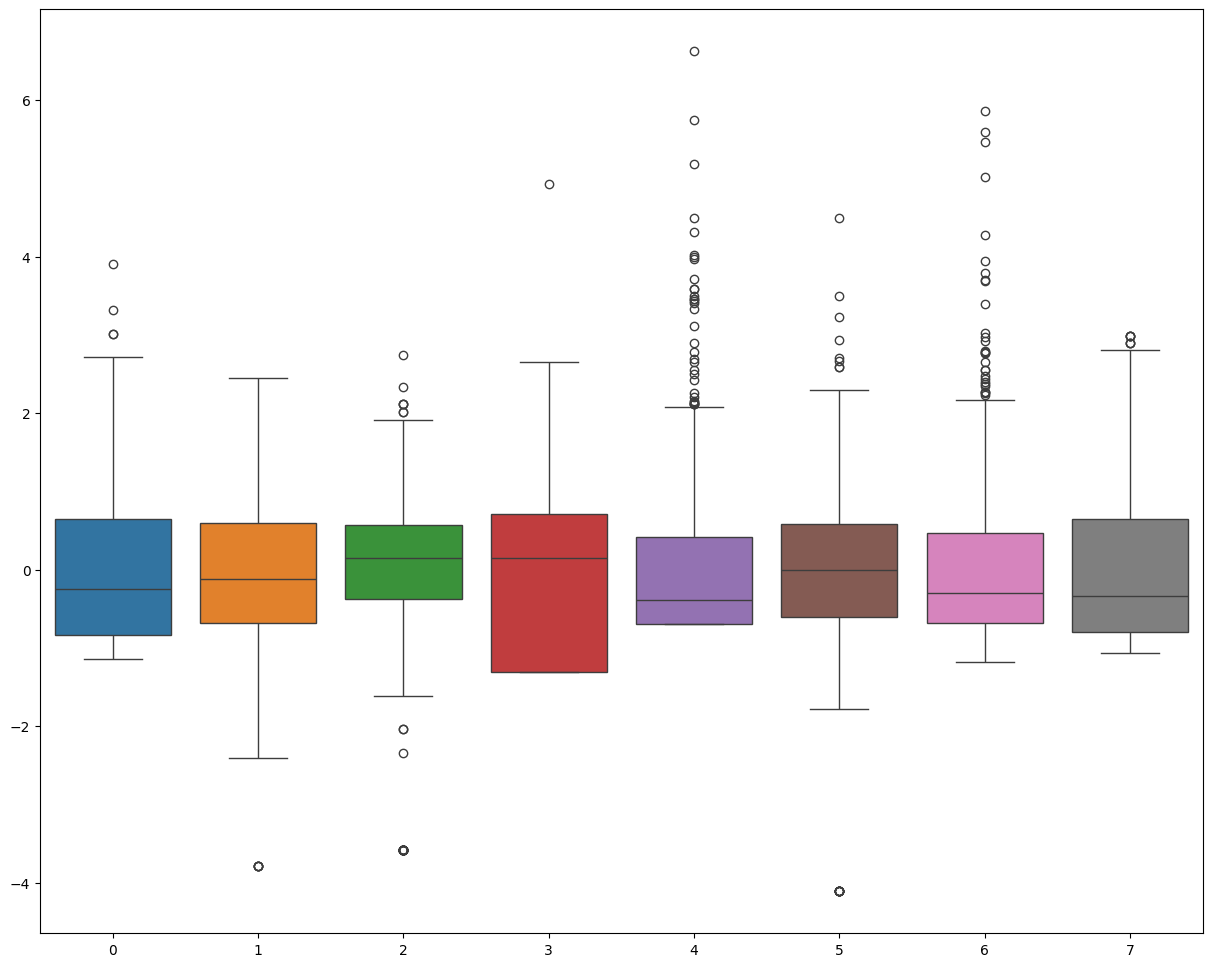

In [56]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scar,ax=ax)
plt.savefig('BoxplotScar.jpg')
plt.show()

In [73]:
x_scar=pd.DataFrame(x_scar)
x_scar.describe()

,0,1,2,3,4,5,6,7
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.872313e-17,-1.076580e-16,1.334023e-16,-8.191369e-18,-3.803136e-17,6.833942e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.136471e+00,-3.787971e+00,-3.587616e+00,-1.302146e+00,-6.980850e-01,-4.109431e+00,-1.183313e+00,-1.062953e+00
25%,-8.398474e-01,-6.837872e-01,-3.691233e-01,-1.302146e+00,-6.980850e-01,-5.987674e-01,-6.852739e-01,-7.928253e-01
50%,-2.466001e-01,-1.193901e-01,1.499884e-01,1.437902e-01,-3.865429e-01,-9.385809e-03,-3.045975e-01,-3.426125e-01
75%,6.432707e-01,6.017840e-01,5.652778e-01,7.095912e-01,4.226010e-01,5.799957e-01,4.627740e-01,6.478556e-01
max,3.906131e+00,2.451752e+00,2.745547e+00,4.921665e+00,6.623153e+00,4.487852e+00,5.864467e+00,2.988962e+00


In [18]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [19]:
y_out_det.value_counts()

,count
Outcome,
0,500
1,268


In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
x_scar.shape

(759, 8)

In [69]:
x_scar.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
x_scar.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64


In [62]:
x_scar.shape

(759, 8)

In [75]:
x_scar.head()

,0,1,2,3,4,5,6,7
0,0.643271,0.852627,0.149988,0.898192,-0.698085,0.195616,0.468793,1.548281
1,-0.839847,-1.122763,-0.161479,0.520991,-0.698085,-0.701269,-0.361774,-0.162527
2,1.236518,1.950066,-0.265301,-1.302146,-0.698085,-1.124086,0.604211,-0.072485
3,-0.839847,-0.997341,-0.161479,0.143790,0.115386,-0.509079,-0.915485,-1.062953
4,-1.136471,0.507718,-1.511169,0.898192,0.755778,1.412818,5.467240,0.017558


In [77]:
x_scar.describe()

,0,1,2,3,4,5,6,7
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.872313e-17,-1.076580e-16,1.334023e-16,-8.191369e-18,-3.803136e-17,6.833942e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.136471e+00,-3.787971e+00,-3.587616e+00,-1.302146e+00,-6.980850e-01,-4.109431e+00,-1.183313e+00,-1.062953e+00
25%,-8.398474e-01,-6.837872e-01,-3.691233e-01,-1.302146e+00,-6.980850e-01,-5.987674e-01,-6.852739e-01,-7.928253e-01
50%,-2.466001e-01,-1.193901e-01,1.499884e-01,1.437902e-01,-3.865429e-01,-9.385809e-03,-3.045975e-01,-3.426125e-01
75%,6.432707e-01,6.017840e-01,5.652778e-01,7.095912e-01,4.226010e-01,5.799957e-01,4.627740e-01,6.478556e-01
max,3.906131e+00,2.451752e+00,2.745547e+00,4.921665e+00,6.623153e+00,4.487852e+00,5.864467e+00,2.988962e+00


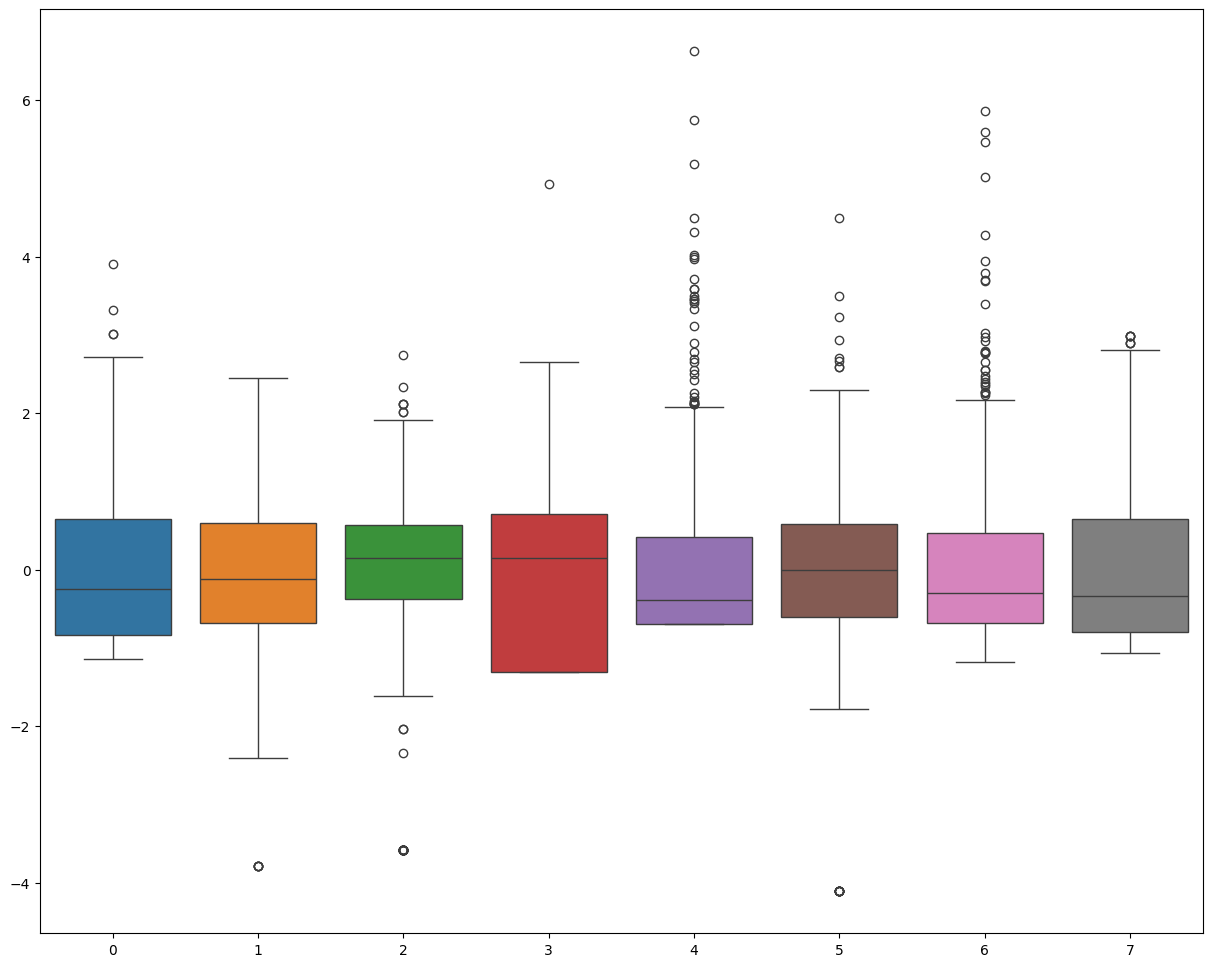

In [78]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scar,ax=ax)
plt.show()

In [79]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
x_scar.columns

RangeIndex(start=0, stop=8, step=1)

In [82]:
x_scale = pd.DataFrame(x_scar)
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']
x_scale.columns = cols

In [83]:
x_scale.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [84]:
x_scale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.872313e-17,-1.076580e-16,1.334023e-16,-8.191369e-18,-3.803136e-17,6.833942e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.136471e+00,-3.787971e+00,-3.587616e+00,-1.302146e+00,-6.980850e-01,-4.109431e+00,-1.183313e+00,-1.062953e+00
25%,-8.398474e-01,-6.837872e-01,-3.691233e-01,-1.302146e+00,-6.980850e-01,-5.987674e-01,-6.852739e-01,-7.928253e-01
50%,-2.466001e-01,-1.193901e-01,1.499884e-01,1.437902e-01,-3.865429e-01,-9.385809e-03,-3.045975e-01,-3.426125e-01
75%,6.432707e-01,6.017840e-01,5.652778e-01,7.095912e-01,4.226010e-01,5.799957e-01,4.627740e-01,6.478556e-01
max,3.906131e+00,2.451752e+00,2.745547e+00,4.921665e+00,6.623153e+00,4.487852e+00,5.864467e+00,2.988962e+00


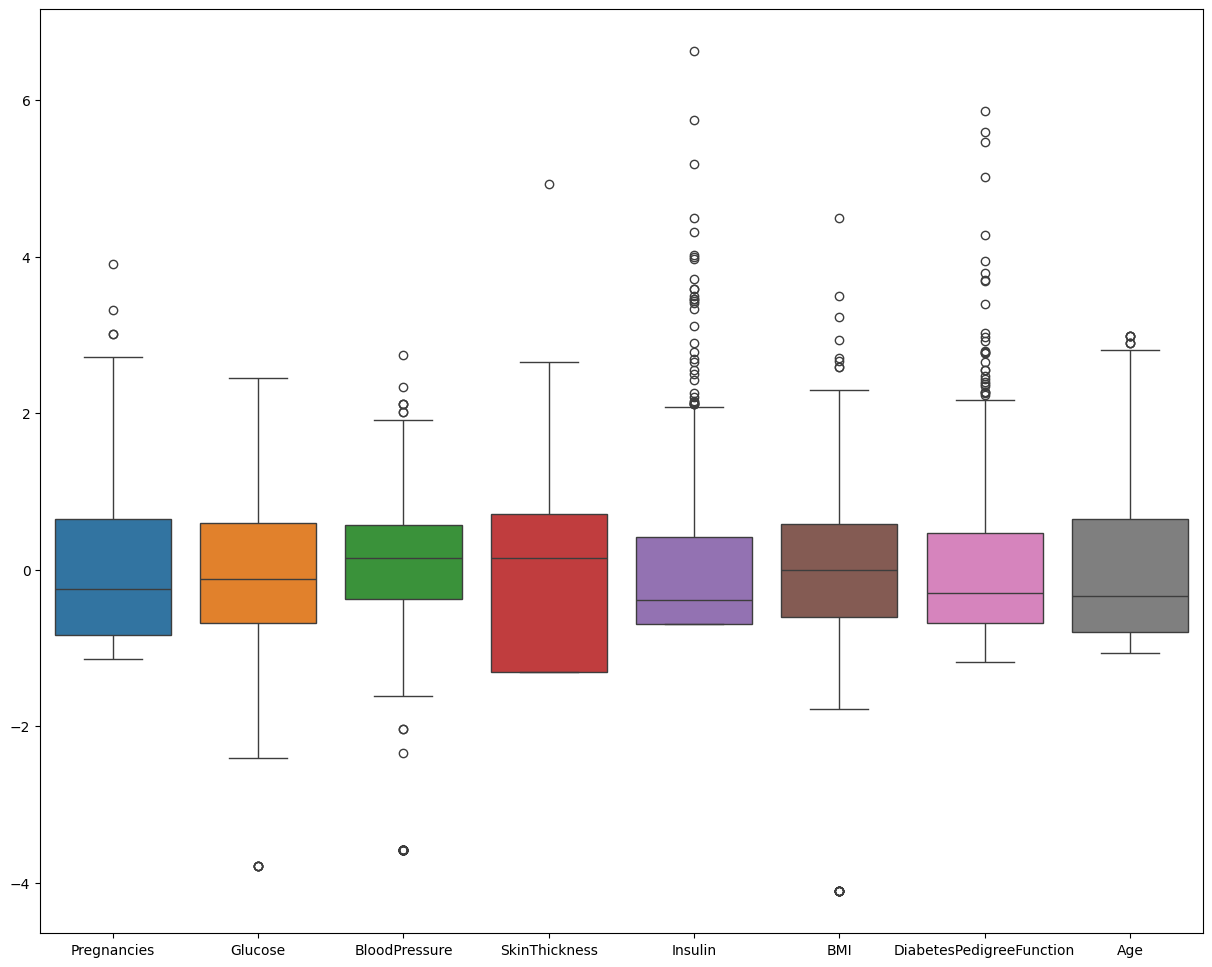

In [85]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=x_scale,ax=ax)
plt.show()

In [86]:
x_scale.shape

(759, 8)

In [87]:
data.shape

(768, 9)

In [94]:
insdata=x_scale['Insulin'].quantile(0.95)
newdata=x_scale[x_scale['Insulin']<insdata]

In [96]:
newdata.shape

(721, 8)

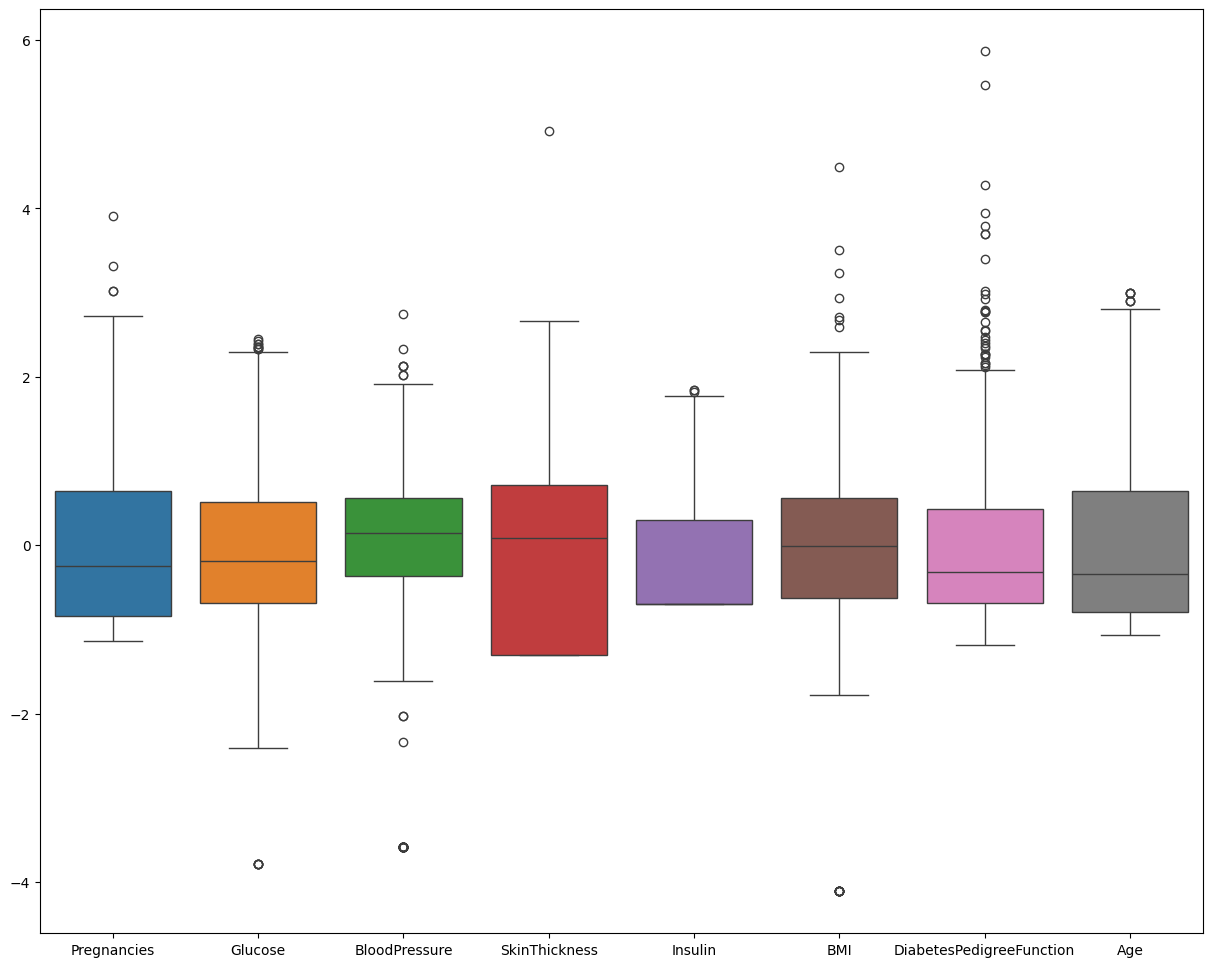

In [97]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(data=newdata,ax=ax)
plt.show()